In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [40]:
df = pd.read_csv('fuel_econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# **Faceting**
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by ("VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, histogram on "comb").

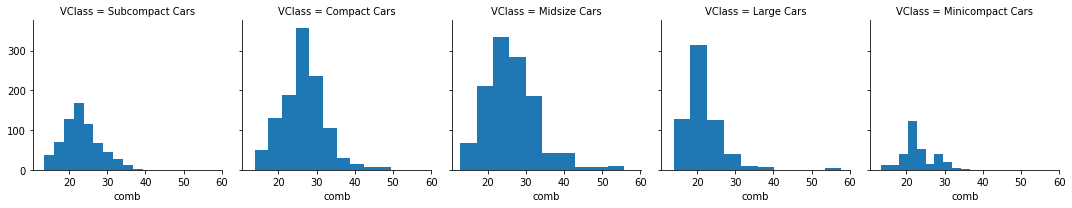

In [41]:
g = sb.FacetGrid(data = df, col = 'VClass')
g.map(plt.hist, "comb")

In the map call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like ```x = "comb"```, or the mapping won't work properly.

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from ```hist``` to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the ```map``` function.

# **Additional Variation**
If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object initialization to facilitate clarity in conveyance of information. Setting col_wrap = 3 means that the plots will be organized into rows of 3 facets each, rather than a single long row of 5 plots.

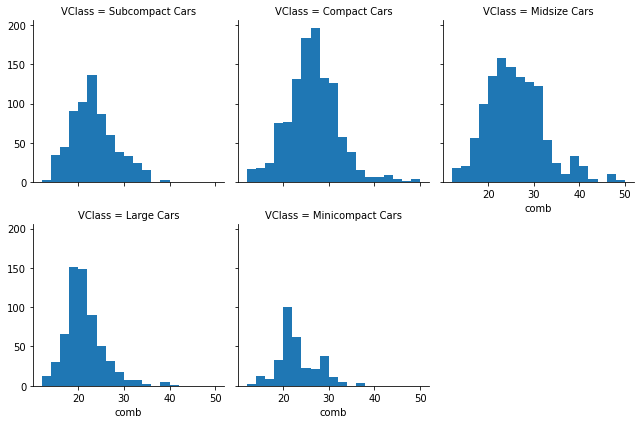

In [42]:
bin_edges = np.arange(12, 50+2, 2)
g = sb.FacetGrid(data = df, col = 'VClass', col_wrap=3)
g.map(plt.hist, "comb", bins = bin_edges)

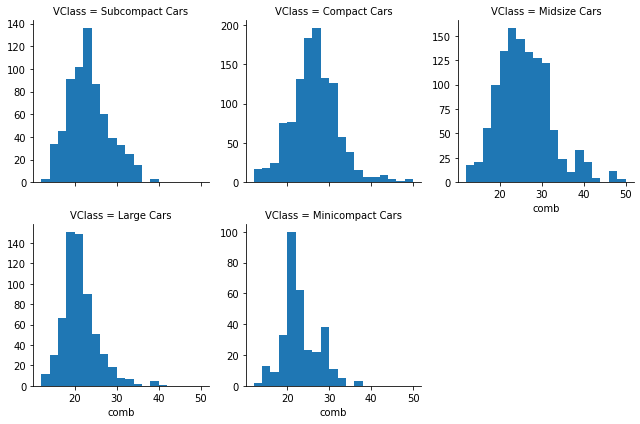

In [43]:
bin_edges = np.arange(12, 50+2, 2)
g = sb.FacetGrid(data = df, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, "comb", bins = bin_edges)

# **Adapted Bar Charts**
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's ```barplot``` function:

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

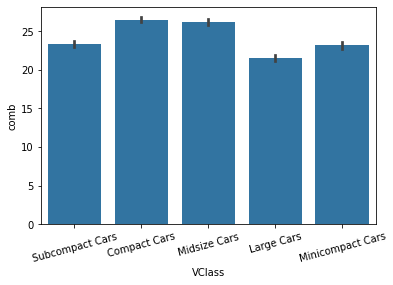

In [44]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation=15)

Different hues are automatically assigned to each category level unless a fixed color is set in the "color" parameter, like in ```countplot``` and ```violinplot```.

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size. The Delta bar dips below the 0 axis due to the negative mean.

As an alternative, the ```pointplot``` function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

Text(0, 0.5, 'Avg. value of comb')

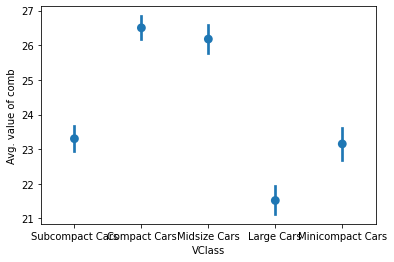

In [45]:
sb.pointplot(data = df, x = 'VClass', y = 'comb', linestyles = "")
plt.ylabel('Avg. value of comb')

By default, ```pointplot``` will connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via ```linestyles = ""``` for nominal data.

# **Line Plots**
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. Often, we have only one observation per time period, like in stock or currency charts. While there is a seaborn function ```tsplot``` that is intended to be used with time series data, it is fairly specialized and (as of this writing's seaborn 0.8) is slated for major changes.

Instead, we will make use of Matplotlib's ```errorbar``` function, performing some processing on the data in order to get it into its necessary form.

<ErrorbarContainer object of 3 artists>

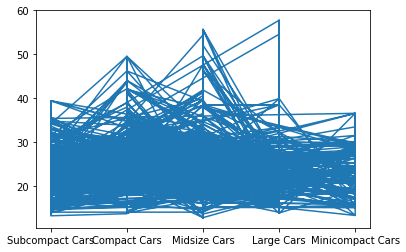

In [46]:
plt.errorbar(data = df, x = 'VClass', y = 'comb')

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [47]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

pd.cut(df['displ'], bins_e, include_lowest=True)

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] < ... <
                                     (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

In [48]:
displ_binned = pd.cut(df['displ'], bins_e, include_lowest=True)

In [49]:
df['comb'].groupby(displ_binned).mean()

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
(1.6, 1.8]      31.996801
(1.8, 2.0]      27.534614
(2.0, 2.2]      31.790900
(2.2, 2.4]      26.888429
(2.4, 2.6]      28.589656
(2.6, 2.8]      20.227183
(2.8, 3.0]      22.464063
(3.0, 3.2]      22.638350
(3.2, 3.4]      21.962225
(3.4, 3.6]      22.602561
(3.6, 3.8]      20.616143
(3.8, 4.0]      18.977208
(4.0, 4.2]      18.320850
(4.2, 4.4]      18.160620
(4.4, 4.6]      18.668650
(4.6, 4.8]      18.661085
(4.8, 5.0]      18.054693
(5.0, 5.2]      16.481675
(5.2, 5.4]            NaN
(5.4, 5.6]      17.972043
(5.6, 5.8]      18.455833
(5.8, 6.0]      15.161788
(6.0, 6.2]      16.428960
(6.2, 6.4]      16.452696
(6.4, 6.6]      14.890232
(6.6, 6.8]      13.716614
(6.8, 7.0]      15.256400
Name: comb, dtype: float64

In [50]:
comb_mean = df['comb'].groupby(displ_binned).mean()

Lets try again now!!

Text(0, 0.5, 'Avg. combined fuel Eff')

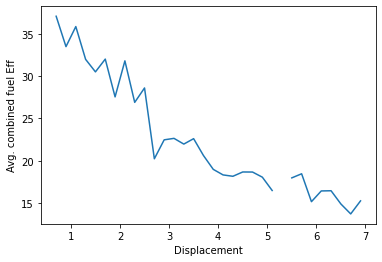

In [51]:
plt.errorbar(x = bins_c, y = comb_mean)
plt.xlabel("Displacement")
plt.ylabel("Avg. combined fuel Eff")